# short econ test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
# define demand and supply with respect to price.
# coefs for demand.
d1 = 5
d2 = .10

# supply
s1 = -.5
s2 = .1

def demand(p):
    return d1 * p + d2 + normal()
def supply(p):
    return s1 * p + s2 + normal()

# create sample space of size m.
m = 1000

sample = np.array([[p, demand(p), supply(p)] for p in normal(0, 5, m)])
df = pd.DataFrame(sample, columns=["price", "demand", "supply"])
df

,price,demand,supply
0,-6.085011,-31.091510,3.229384
1,2.290315,10.971135,-0.164768
2,2.413073,10.403910,-2.380686
3,-8.296109,-43.143229,4.549936
4,1.007748,4.309859,-0.429512
...,...,...,...
995,5.003162,23.350119,-3.910582
996,3.460056,17.411868,-0.008829
997,2.712302,14.041484,1.461588
998,-9.134812,-46.909118,5.427565


In [3]:
x, y, z = sample.T

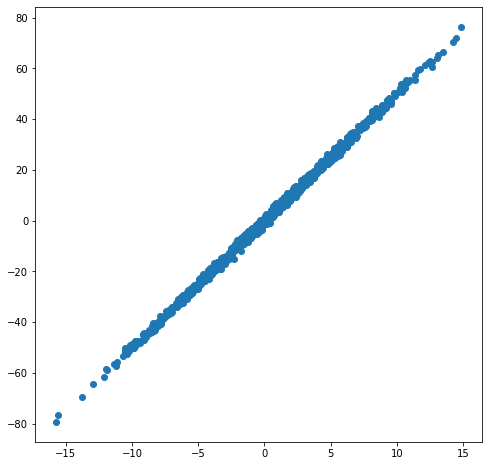

In [4]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y)
plt.show()

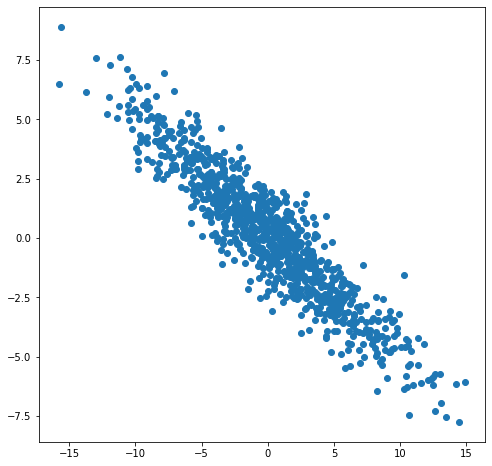

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(x, z)
plt.show()

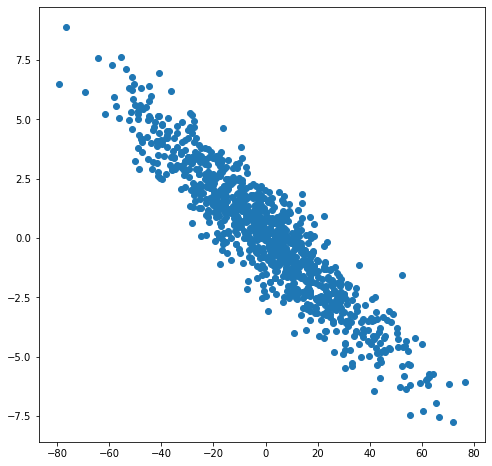

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(y, z)
plt.show()

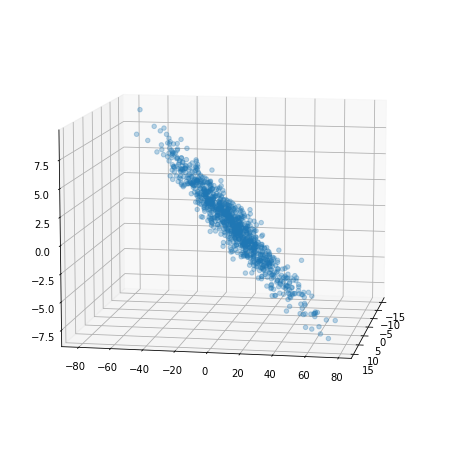

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, alpha=.3)
ax.view_init(10, 10)

In [8]:
# standardize.
from opioid_crisis_lib import standardize

df_standardized = standardize(df)
df_standardized

array([[-1.20643133, -1.23595278,  1.13709527],
       [ 0.46183   ,  0.43954834, -0.11460121],
       [ 0.48628183,  0.41695383, -0.93178819],
       ...,
       [ 0.54588468,  0.56185102,  0.48516707],
       [-1.81391382, -1.86602299,  1.94774119],
       [-0.83742285, -0.79973018,  1.1885338 ]])

In [9]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df_standardized)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,2.067301,-0.043238,0.020900
1,-0.589924,0.267056,0.017137
2,-1.054532,-0.405379,0.046680
3,2.879574,-0.011510,0.049205
4,-0.342008,-0.022274,0.022571
...,...,...,...
995,-1.975310,-0.456272,0.046443
996,-0.842395,0.510857,0.001775
997,-0.369894,0.843912,-0.006736
998,3.247801,0.127932,0.037955


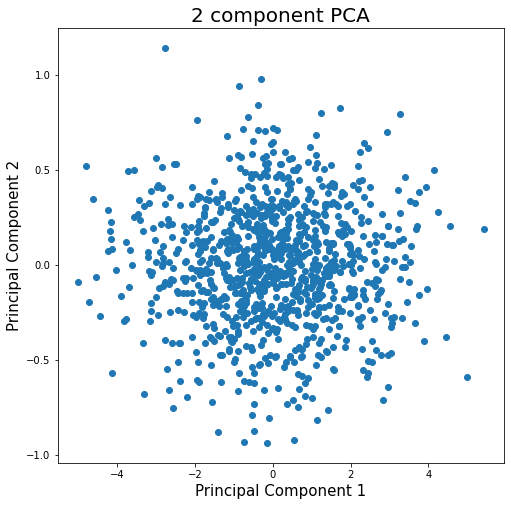

In [10]:
fig = plt.figure(figsize = (8,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.show()

In [13]:
np.round(pca.explained_variance_ratio_, 3)

array([0.967, 0.033, 0.   ])

In [17]:
eigen_values, eigen_vectors = np.linalg.eig(principalDf.cov())
eigen_vectors

array([[ 1.00000000e+00,  8.87348326e-18,  1.72267658e-19],
       [ 0.00000000e+00, -1.00000000e+00,  3.89958078e-18],
       [ 0.00000000e+00, -3.03931313e-18,  1.00000000e+00]])